## 客戶流失預測

### 資料讀取

In [1]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col= 0)

### 資料前處理

In [2]:
del customers['state']
del customers['account_length']
del customers['area_code']

In [3]:
customers.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 變數轉換

In [4]:

categorical_var = ['international_plan', 'voice_mail_plan', 'churn']

# method 1
pandas.get_dummies(customers['churn']).head()

# method 2
from sklearn.preprocessing import LabelEncoder


for var in categorical_var:
    le = LabelEncoder()
    customers[var] = le.fit_transform(customers[var])

In [5]:
customers.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
y = customers['churn']
X = customers[[c for c in customers.columns if c not in ['churn']]]

### 產生訓練與測試資料集

In [7]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.33, random_state = 42)

### 建立決策樹模型

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 驗證預測結果

In [9]:
predicted = clf.predict(test_X)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)
confusion_matrix(test_y, predicted)

array([[923,  17],
       [ 51, 109]], dtype=int64)

### 模型比較

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier(max_depth = 5)
clf1.fit(train_X, train_y)

clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

clf3 = SVC(kernel = 'rbf', probability=True)
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier(n_estimators = 100)
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 繪製ROC Curve

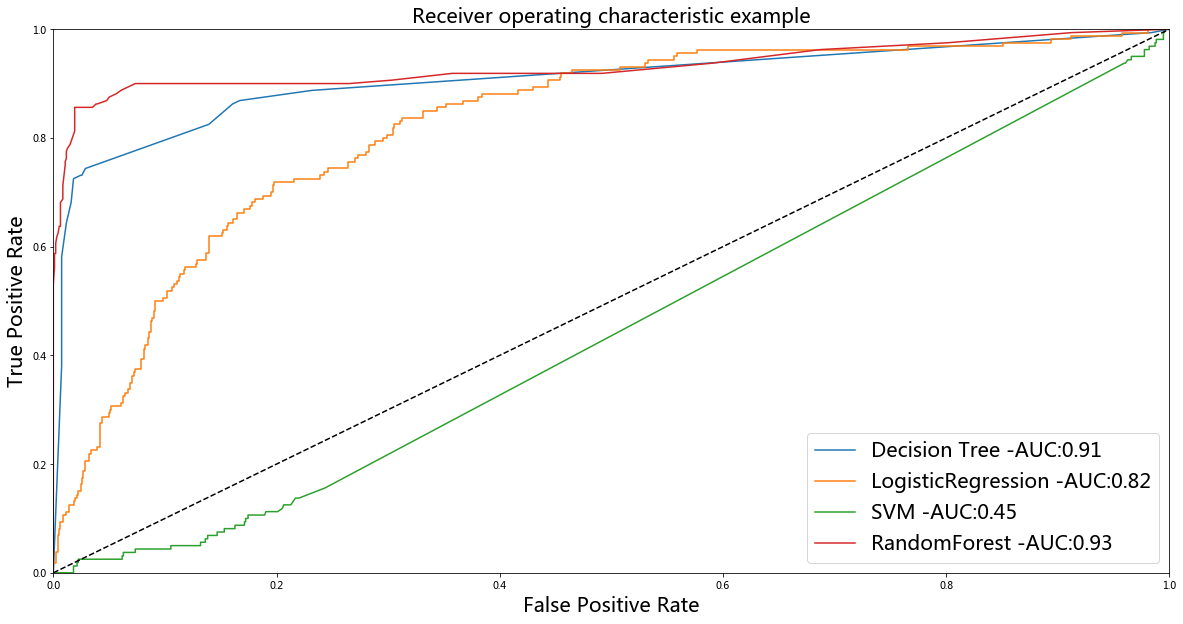

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plt.figure(figsize=[20,10])

for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','LogisticRegression','SVM','RandomForest']):
    probas_=clf.fit(train_X,train_y).predict_proba(test_X)
    fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s -AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic example',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

### 尋找重要特徵

In [24]:
a = ['a', 'b', 'c']
b = [1,2,3]
list(zip(a,b))

[('a', 1), ('b', 2), ('c', 3)]

In [23]:
for feature, importance in zip(train_X.columns, clf4.feature_importances_):
    print(feature, importance)

international_plan 0.08254078867322823
voice_mail_plan 0.020105416842356408
number_vmail_messages 0.03126039362696871
total_day_minutes 0.13194223468870103
total_day_calls 0.03697966531591822
total_day_charge 0.13700504415368517
total_eve_minutes 0.07552663046572922
total_eve_calls 0.02922823190416118
total_eve_charge 0.06903163004298934
total_night_minutes 0.04212042624226858
total_night_calls 0.036230759784805444
total_night_charge 0.039915070202675026
total_intl_minutes 0.048711643170534835
total_intl_calls 0.05603515102922032
total_intl_charge 0.04503902511778609
number_customer_service_calls 0.11832788873897224


In [32]:
feature_value = pandas.DataFrame(list(zip(train_X.columns, clf4.feature_importances_)))
feature_value.columns = ['feature','importance']
feature_value = feature_value.set_index(['feature'])
feature_value.sort_values('importance', ascending=False)

,importance
feature,
total_day_charge,0.137005
total_day_minutes,0.131942
number_customer_service_calls,0.118328
international_plan,0.082541
total_eve_minutes,0.075527
total_eve_charge,0.069032
total_intl_calls,0.056035
total_intl_minutes,0.048712
total_intl_charge,0.045039


### 使用RFE (Feature Selection/Elimination) 找出重要變數

In [37]:
predicted = clf2.predict(test_X)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)
#confusion_matrix(test_y, predicted)

0.8563636363636363

In [39]:
confusion_matrix(test_y, predicted)

array([[918,  22],
       [136,  24]], dtype=int64)

In [60]:
from sklearn.feature_selection import RFE
## RFE 缺點是: 必須要告知選用多少Feature
selector = RFE(clf2, 5, step=1)

In [41]:
selector = selector.fit(train_X, train_y)


In [43]:
train_X.columns[selector.support_ ]

Index(['international_plan', 'voice_mail_plan', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

In [44]:
selector.ranking_

array([ 1,  1,  8,  6,  9,  2,  7, 10,  3, 12, 11,  5,  1,  1,  4,  1])

### 使用RFECV (Feature Selection/Elimination) 找出重要變數

In [61]:
from sklearn.feature_selection import RFECV
# 優點: 不需要告知選用多少Feature
selector = RFECV(clf2, step=1, cv=5)
selector = selector.fit(train_X, train_y)

In [46]:
train_X.columns[selector.support_ ]

Index(['international_plan', 'voice_mail_plan', 'total_day_charge',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls'],
      dtype='object')

In [52]:
df = pandas.DataFrame(list(zip(train_X.columns, selector.ranking_)))
df.columns = ['feature', 'ranking']
df.sort_values('ranking')[0:5]

,feature,ranking
0,international_plan,1
1,voice_mail_plan,1
5,total_day_charge,1
12,total_intl_minutes,1
13,total_intl_calls,1


In [58]:
?RFECV

In [59]:
def getRanking(estimator):
    selector = RFECV(estimator, step=1, cv=5,scoring='roc_auc')
    selector = selector.fit(train_X, train_y)
    df = pandas.DataFrame(list(zip(train_X.columns, selector.ranking_)))
    df.columns = ['feature', 'ranking']
    print(df.sort_values('ranking')[0:10])
    
getRanking(clf2)

                          feature  ranking
0              international_plan        1
1                 voice_mail_plan        1
5                total_day_charge        1
8                total_eve_charge        1
11             total_night_charge        1
12             total_intl_minutes        1
13               total_intl_calls        1
14              total_intl_charge        1
15  number_customer_service_calls        1
3               total_day_minutes        2


## 電影評價預測

### 寫爬蟲抓取電影評論

In [63]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://movies.yahoo.com.tw/movieinfo_main.html/id=7413?sort=update_ts&order=desc&page=2')
soup =BeautifulSoup(res.text, 'lxml' )

In [72]:
for rec in soup.select('#form_good1'):
    comments = rec.select('span')[2].text
    stars = rec.select_one('input[name="score"]').get('value')

5
1
3


In [91]:
def getMovieReview(movieid):
    ary = []
    for page in range(1,11):
    #page = 2
    #if True:
        res = requests.get('https://movies.yahoo.com.tw/movieinfo_review.html/id={}?sort=update_ts&order=desc&page={}'.format(movieid, page))
        soup =BeautifulSoup(res.text, 'lxml' )
        for rec in soup.select('#form_good1'):
            comments = rec.select('span')[2].text
            stars = rec.select_one('input[name="score"]').get('value')
            ary.append({'comments':comments, 'stars':stars})
    return ary

In [92]:
movie_ary = getMovieReview('7413')

In [94]:
import pandas 
moviedf = pandas.DataFrame(movie_ary)
moviedf.head()

,comments,stars
0,艾莉西亞薇坎德在這部作品表現得非常勇敢，情節上驚險刺激，絕無冷場！,5
1,整體看下來 說實在的 女主角選的很好沒問題 但是整體內容不好看... 整場下來 講話佔了...,1
2,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3
3,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5
4,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5


In [103]:
def convertRate(stars):
    stars = int(stars)
    if stars >= 4:
        return 'good'
    elif stars == 3:
        return 'soso'
    else:
        return 'bad'

moviedf['stars'].map(convertRate).head()

0    good
1     bad
2    soso
3    good
4    good
Name: stars, dtype: object

### 安裝Jieba
- pip install jieba

In [95]:
! pip install jieba

### 使用Jieba 切詞

In [97]:
import jieba
print(list(jieba.cut('我覺得很好看啊。從頭到尾無冷場。女主角也有屬於自己的特色。然後吳彥祖很帥。')))

['我覺', '得', '很', '好看', '啊', '。', '從頭', '到', '尾', '無', '冷場', '。', '女主角', '也', '有屬', '於', '自己', '的', '特色', '。', '然後吳彥', '祖', '很帥', '。']


### 讀取電影資料集

In [106]:
import pandas
movies = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/yahoo_movie.xlsx')
movies = movies[movies['status'] != 'soso']

### 文字預處理

In [139]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
scores = []
for movie in movies.iterrows():
    corpus.append(' '.join(jieba.cut(movie[1].content)))
    scores.append(movie[1].status)

In [140]:
corpus[0]

'很 好看 的 動作片 ， 不會 浪費 錢 跟 時間 。 很久 沒有 這樣 的 探險片 。 可說 是 女版 的 印第安那 瓊 。 女主角 跟 爸爸 還有 反派 都 演得 到位 。 陸任 的 男配角 常在 港片 看到 ， 很帥 。 一時 忘 了 名字 。 希望 有續 集 。'

### 建立詞頻矩陣

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
sentence = ['this is a book', 'this is my car']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentence)
print(vectorizer.get_feature_names())
X.toarray()

['book', 'car', 'is', 'my', 'this']


array([[1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1]], dtype=int64)

In [162]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#sentence = ['this is a book', 'this is my car']
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
X

<980x5899 sparse matrix of type '<class 'numpy.float64'>'
	with 16897 stored elements in Compressed Sparse Row format>

### 產生訓練與測試資料集

In [163]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, scores, test_size = 0.3, random_state = 42)

### 建立Naive Bayes 模型

In [164]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_X,train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 驗證結果

In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix
predicted = clf.predict(test_X)

print(accuracy_score(test_Y, predicted))

print(clf.classes_)
confusion_matrix(test_Y, predicted)


0.8197278911564626
['bad' 'good']


array([[ 72,  45],
       [  8, 169]], dtype=int64)

### 排序特徵

In [166]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)

(4.8179353022884825, '還不錯', 0.25067745442928, 6.025683059471123)
(4.779088648725993, '好看', 5.547776108669207, 31.292402475340257)
(4.431833283792443, '不錯', 0.5583750193620073, 6.906458279439237)
(3.212964578876871, '非常', 0.8093320260213661, 5.813319711034174)
(2.982547081223886, '希望', 0.0, 2.982547081223886)
(2.788027322437823, '雖然', 0.6922251230316834, 4.71796987872804)
(2.642366505779272, '有些', 0.327948560638912, 3.5089267980300547)
(2.642253529662465, '爽片', 1.2301739170550365, 5.892684904099836)
(2.510567230729631, '刺激', 0.4744688824535621, 3.701753259018453)
(2.388851719370068, '不過', 0.5271655312434173, 3.648172005073541)
(2.3818045781395365, '大家', 0.7028096478031094, 4.055759814837618)
(2.317610244969823, '感動', 0.0, 2.317610244969823)
(2.1649985397356164, '但是', 0.741982835065923, 3.771390294162232)
(2.160756564443945, '其實', 0.6288540994060633, 3.5195571878130814)
(2.0885042689550155, '效果', 0.0, 2.0885042689550155)
(2.0195696651610677, '期待', 1.4296069489995284, 4.906760492463981)
(

### 利用既有模型預測評論好壞

In [169]:
sentence = '很失望，一直很努力的看完它，很多地方不知道想表達什麼？是導演不行還是編劇？'
sample_text = ' '.join(jieba.cut(sentence))

X2 = vectorizer.transform([sample_text])
clf.predict(X2)

array(['bad'], dtype='<U4')

## 使用深度學習模型分類數據

### 安裝tensorflow 與 keras
- !pip install tensorflow
- conda install keras (需要在Anaconda Promopt 下)

In [170]:
! pip install tensorflow

  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\de\f7\bf\1bcac7bf30549e6a4957382e2ecab04c88e513117207067b03
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\8e\fa\d6\77dd17d18ea23fd7b860e02623d27c1be451521af40dd4a13e
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\3c\0f\0a\6c94612a8c26070755559045612ca3645fea91c11f2148363e
  Running setup.py bdist_wheel for html5lib: started
  Running setup.py bdist_wheel for html5lib: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\6f\85\6c\56b8e1292c6214c4eb73b9dda50f53e8e977bf65989

## 客戶流失分析 (使用深度學習方法)

### 讀取客戶資料

In [63]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Churn_Modelling.csv')

### 分離出特徵(X)與目標(y)

In [64]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:,13].values

### 類別特徵轉換

In [67]:
set(X[:,1])

{'France', 'Germany', 'Spain'}

In [68]:
set(X[:,2])

{'Female', 'Male'}

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencode_X_1 = LabelEncoder()
X[:,1] = labelencode_X_1.fit_transform(X[:,1])

In [70]:
labelencode_X_2 = LabelEncoder()
X[:,2] = labelencode_X_1.fit_transform(X[:,2])

In [71]:
onehotencoder = OneHotEncoder(categorical_features=[1])

In [72]:
X2 = onehotencoder.fit_transform(X).toarray()

### 剃除多餘的虛擬變量 (REMOVE France)

In [73]:
X2 = X2[:,1:]

### 產生訓練與測試資料集

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

In [75]:
X_train.shape

(8000, 11)

### 將資料標準化

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [77]:
X_test = sc.transform(X_test)

### 建立深度學習模型

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [79]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [80]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4834 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.4269 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.4217 - acc: 0.8026
Epoch 4/100
8000/8000 [==============================] - 1s 72us/step - loss: 0.4181 - acc: 0.8251
Epoch 5/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4157 - acc: 0.8299
Epoch 6/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4142 - acc: 0.8312
Epoch 7/100
8000/8000 [==============================] - 1s 72us/step - loss: 0.4123 - acc: 0.8325
Epoch 8/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.4116 - acc: 0.8327
Epoch 9/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4102 - acc: 0.8345
Epoch 10/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.4090 - acc: 0.8342
Epoch 11/

8000/8000 [==============================] - 1s 72us/step - loss: 0.4004 - acc: 0.8362: 0s - loss: 0.4003 - acc: 0.83
Epoch 81/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.3998 - acc: 0.8356
Epoch 82/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4007 - acc: 0.8347
Epoch 83/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4003 - acc: 0.8355: 0s - loss: 0.4044 - acc: 0.
Epoch 84/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4001 - acc: 0.8354
Epoch 85/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.3999 - acc: 0.8357: 0s - loss: 0.4012 - acc: 0.
Epoch 86/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4008 - acc: 0.8360
Epoch 87/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4003 - acc: 0.8350
Epoch 88/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.4002 - acc: 0.8362
Epoch 89/100
8000/8000 [

### 驗證預測結果

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred = (y_pred > 0.5)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )

In [84]:
cm

array([[1538,   57],
       [ 262,  143]], dtype=int64)

### 繪製 ROC Curve

In [95]:
from sklearn.metrics import roc_curve
y_pred = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


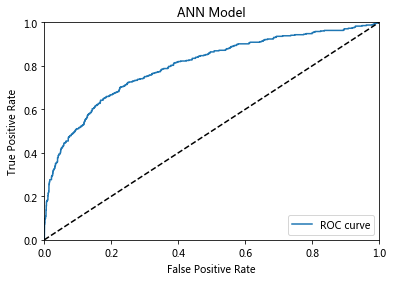

In [97]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Model')
plt.legend(loc="lower right")
plt.show()

### 不同模型的比較

In [87]:
classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

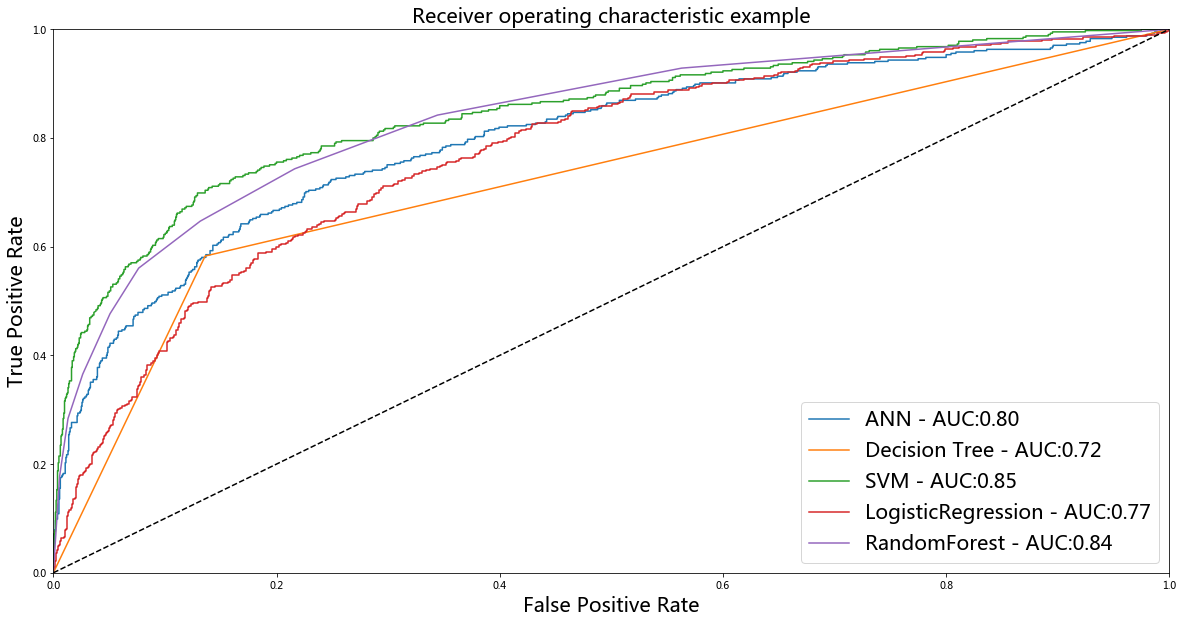

In [89]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()